# CONTROL DIFUSO

In [5]:
#Importacion de librerias
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

#Generacion de variables
#Calidad y servicio en rangos subjetivos de [0,10]
#La propina tiene un rango de [0,25] en unidades de puntos porcentuales
x_calidad = np.arange(0,11,1)#crea un arreglo de 0 a 10
x_servicio = np.arange(0,11,1) #crea un arreglo de 0 a 10
x_propina = np.arange(0,26,1) #crea un arreglo de 0 a 25

print('x_calidad = ',x_calidad)
print('x_servicio= ',x_servicio)
print('x_propina = ',x_propina)

x_calidad =  [ 0  1  2  3  4  5  6  7  8  9 10]
x_servicio=  [ 0  1  2  3  4  5  6  7  8  9 10]
x_propina =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


0.0


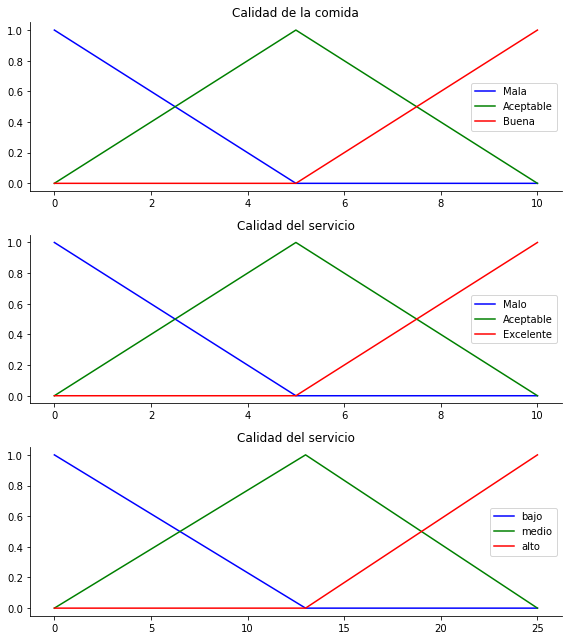

In [28]:
#Generar funciones de pertenencia difusas
calidad_baja = fuzz.trimf(x_calidad,[0,0,5])#Se define el rango de valores para los cuales se toma una calidad como baja
calidad_media = fuzz.trimf(x_calidad,[0,5,10])#Se define el rango de valores para los cuales se toma una calidad como media
calidad_alta = fuzz.trimf(x_calidad,[5,10,10])#Se define el rango de valores para los cuales se toma una calidad como alta
servicio_bajo = fuzz.trimf(x_servicio,[0,0,5])#Se define el rango de valores para los cuales se toma un servicio como bajo
servicio_medio = fuzz.trimf(x_servicio,[0,5,10])#Se define el rango de valores para los cuales se toma un servicio como medio
servicio_alto = fuzz.trimf(x_servicio,[5,10,10])#Se define el rango de valores para los cuales se toma un servicio como alta
propina_baja = fuzz.trimf(x_propina,[0,0,13])#Se define el rango de valores para los cuales se toma una propina como baja
propina_media = fuzz.trimf(x_propina,[0,13,25])#Se define el rango de valores para los cuales se toma una propina como media
propina_alta = fuzz.trimf(x_propina,[13,25,25])#Se define el rango de valores para los cuales se toma una propina como alta

#Visualizacion funciones pertenencia
fig, (ax0,ax1,ax2) = plt.subplots(nrows=3,figsize=(8,9))#Creacion de los planos cartesianos
ax0.plot(x_calidad,calidad_baja,'b',linewidth=1.5,label='Mala')#Asignacion datos para grafica ax0 calidad baja
ax0.plot(x_calidad,calidad_media,'g',linewidth=1.5,label='Aceptable')#Asignacion datos para grafica ax0 calidad media 
ax0.plot(x_calidad,calidad_alta,'r',linewidth=1.5,label='Buena')#Asignacion datos para grafica ax0 calidad alta
ax0.set_title('Calidad de la comida')
ax0.legend()

ax1.plot(x_servicio,servicio_bajo,'b',linewidth=1.5,label='Malo')#Asignacion datos para grafica ax0 calidad baja
ax1.plot(x_servicio,servicio_medio,'g',linewidth=1.5,label='Aceptable')#Asignacion datos para grafica ax0 calidad media 
ax1.plot(x_servicio,servicio_alto,'r',linewidth=1.5,label='Excelente')#Asignacion datos para grafica ax0 calidad alta
ax1.set_title('Calidad del servicio')
ax1.legend()

ax2.plot(x_propina,propina_baja,'b',linewidth=1.5,label='bajo')#Asignacion datos para grafica ax0 calidad baja
ax2.plot(x_propina,propina_media,'g',linewidth=1.5,label='medio')#Asignacion datos para grafica ax0 calidad media 
ax2.plot(x_propina,propina_alta,'r',linewidth=1.5,label='alto')#Asignacion datos para grafica ax0 calidad alta
ax2.set_title('Calidad del servicio')
ax2.legend()

#Ocultar los ejes superiores y derechos
for ax in (ax0,ax1,ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

In [37]:
#Activacion funciones de pertenencia difusa
nivel_calidad_bajo = fuzz.interp_membership(x_calidad,calidad_baja,6.5)
nivel_calidad_medio = fuzz.interp_membership(x_calidad,calidad_media,6.5)
nivel_calidad_alto = fuzz.interp_membership(x_calidad,calidad_alta,6.5)
nivel_servicio_bajo = fuzz.interp_membership(x_servicio,servicio_bajo,9.8)
nivel_servicio_medio = fuzz.interp_membership(x_servicio,servicio_medio,9.8)
nivel_servicio_alto = fuzz.interp_membership(x_servicio,servicio_alto,9.8)

print(nivel_calidad_bajo,nivel_calidad_medio,nivel_calidad_alto)
print(nivel_servicio_bajo,nivel_servicio_medio,nivel_servicio_alto)

0.0 0.7 0.30000000000000004
0.0 0.03999999999999987 0.9600000000000002


In [45]:
#Ahora se toman las reglas y se aplican
#la primera regla se refiere a la mala comida o servicio
activar_regla1 = np.fmax(nivel_calidad_bajo,nivel_servicio_bajo)
print(activar_regla1)
activacion_propina_baja = np.fmin(activar_regla1, propina_baja)
print(activacion_propina_baja)
#Para la regla 2 se conecta un servicio aceptable con una propina media 
activacion_propina_media = np.fmin(nivel_servicio_medio,propina_media)
print(activacion_propina_media)
#para la regla 3 se conectan servicio o comida buena con propinas altas
activar_regla3 =np.fmax(nivel_calidad_alto,nivel_servicio_alto)
activacion_propina_alta = np.fmin(activar_regla3,propina_alta)
print(activacion_propina_alta)
propina0 = np.zeros_like(x_propina)
print(propina0)

0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[0.   0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.  ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.08333333 0.16666667 0.25       0.33333333
 0.41666667 0.5        0.58333333 0.66666667 0.75       0.83333333
 0.91666667 0.96      ]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


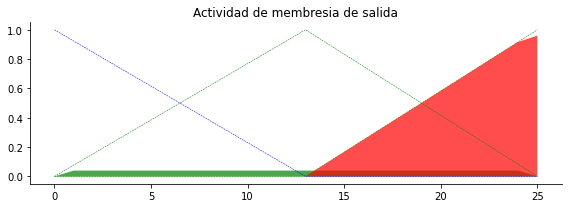

In [59]:
#Visualizacion de lo anterior
fig, ax0 = plt.subplots(figsize=(8,3))
ax0.fill_between(x_propina,propina0,activacion_propina_baja, facecolor='b', alpha=0.7)
ax0.plot(x_propina,propina_baja,'b',linewidth=0.5,linestyle='--',)
ax0.fill_between(x_propina,propina0,activacion_propina_media, facecolor='g',alpha=0.7)
ax0.plot(x_propina,propina_media,'g',linewidth=0.5,linestyle = '--',)
ax0.fill_between(x_propina,propina0,activacion_propina_alta, facecolor='r',alpha=0.7)
ax0.plot(x_propina,propina_alta,'g',linewidth=0.5,linestyle = '--',)
ax0.set_title('Actividad de membresia de salida')

#Ocultar los ejes superior y derecho
for aa in (ax0,):
    aa.spines['top'].set_visible(False)
    aa.spines['right'].set_visible(False)
    aa.get_xaxis().tick_bottom()
    aa.get_yaxis().tick_left()
plt.tight_layout()

In [60]:
#Agregar las 3 funciones de pertenencia de salida juntas
agregado = np.fmax(activacion_propina_baja,np.fmax(activacion_propina_media,activacion_propina_alta))

print(agregado)

[0.         0.04       0.04       0.04       0.04       0.04
 0.04       0.04       0.04       0.04       0.04       0.04
 0.04       0.04       0.08333333 0.16666667 0.25       0.33333333
 0.41666667 0.5        0.58333333 0.66666667 0.75       0.83333333
 0.91666667 0.96      ]


In [63]:
#Calcular el resultado difuso
propina = fuzz.defuzz(x_propina,agregado,'centroid')
activacion_propina = fuzz.interp_membership(x_propina,agregado,propina) #para dibujar
print(activacion_propina)

0.5723931623931626


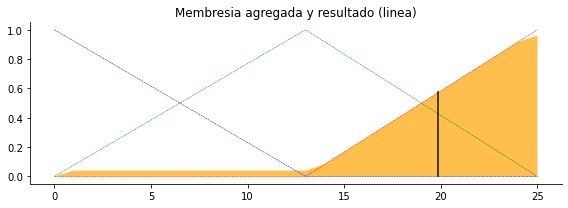

In [72]:
#visualizar anterior
fig, ax0 = plt.subplots(figsize=(8,3))
ax0.plot(x_propina,propina_baja,'b',linewidth=0.5,linestyle='--')
ax0.plot(x_propina,propina_media,'g',linewidth=0.5,linestyle='--')
ax0.plot(x_propina,propina_alta,'r',linewidth=0.5,linestyle='--')
ax0.fill_between(x_propina,propina0,agregado,facecolor='Orange',alpha=0.7)
ax0.plot([propina,propina],[0, activacion_propina],'k',linewidth=1.5,alpha=0.9)
ax0.set_title('Membresia agregada y resultado (linea)')

#Ocultar los ejes superior y derecho
for aa in (ax0,):
    aa.spines['top'].set_visible(False)
    aa.spines['right'].set_visible(False)
    aa.get_xaxis().tick_bottom()
    aa.get_yaxis().tick_left()
plt.tight_layout()